In [1]:
# ibis 설치

# !pip install 'ibis-framework[duckdb]'
# !pip install pins
# !pip install gcsfs

In [2]:
# 버전 확인
import ibis
print(ibis.__version__)  

11.0.0


In [3]:
# load library

import os, glob
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

import ibis
import ibis.selectors as s
from ibis.interactive import *

In [4]:
# options 

ibis.options.interactive = True

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# 내장 데이터 읽어오기

peng = ibis.examples.penguins.fetch()
peng

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

In [7]:
# 데이터 저장

type(peng)
# peng.to_csv("peng.csv")

ibis.expr.types.relations.Table

In [8]:
# 디렉토리 보기 및 파일 사이즈 보기

os.listdir()

!du -h peng.csv

['vaex_ref_review.ipynb',
 '.Rhistory',
 '.DS_Store',
 '16_vaex_텐서플로.ipynb',
 'vaex_ref_interactive.ipynb',
 '02_ibis_selectors.ipynb',
 'peng.csv',
 'vaex_ref_ml.ipynb',
 '11_vaex_전처리.ipynb',
 '12_vaex_시각화.ipynb',
 '14_vaex_모델링_회귀.ipynb',
 '.Rapp.history',
 '.ipynb_checkpoints',
 '13_vaex_모델링_분류.ipynb',
 '2026_Python으로 DB 다루기_이후선.hwp',
 '00_ibis_file.ipynb',
 'taxi_s.hdf5',
 '15_vaex_모델링_군집.ipynb',
 '01_ibis_db.ipynb',
 'vaex_ref_plot.ipynb']

 16K	peng.csv


In [9]:
# 소스 보기

peng.op().source
peng.op().source.list_tables()

['penguins']

In [10]:
# 데이터 기초 정보 보기
peng.columns

peng.schema()

peng.info()

peng.describe()

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year')

ibis.Schema {
  species            string
  island             string
  bill_length_mm     float64
  bill_depth_mm      float64
  flipper_length_mm  int64
  body_mass_g        int64
  sex                string
  year               int64
}

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┓
┃ name              ┃ type    ┃ nullable ┃ nulls ┃ non_nulls ┃ null_frac ┃ pos   ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━┩
│ string            │ string  │ boolean  │ int64 │ int64     │ float64   │ int16 │
├───────────────────┼─────────┼──────────┼───────┼───────────┼───────────┼───────┤
│ species           │ string  │ True     │     0 │       344 │  0.000000 │     0 │
│ island            │ string  │ True     │     0 │       344 │  0.000000 │     1 │
│ bill_length_mm    │ float64 │ True     │     2 │       342 │  0.005814 │     2 │
│ bill_depth_mm     │ float64 │ True     │     2 │       342 │  0.005814 │     3 │
│ flipper_length_mm │ int64   │ True     │     2 │       342 │  0.005814 │     4 │
│ body_mass_g       │ int64   │ True     │     2 │       342 │  0.005814 │     5 │
│ sex               │ string  │ True     │    11 │       333 │  0.031977 │     6 │
│ year              │ int64   │ True     │     0 │       344 │  0.000000 │     7 │
└───────────────────┴─────────┴──────────┴───────┴───────────┴───────────┴───────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ name              ┃ pos   ┃ type    ┃ count ┃ nulls ┃ unique ┃ mode   ┃ mean        ┃ std        ┃ min     ┃ p25      ┃ p50     ┃ p75     ┃ max     ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ string            │ int16 │ string  │ int64 │ int64 │ int64  │ string │ float64     │ float64    │ float64 │ float64  │ float64 │ float64 │ float64 │
├───────────────────┼───────┼─────────┼───────┼───────┼────────┼────────┼─────────────┼────────────┼─────────┼──────────┼─────────┼─────────┼─────────┤
│ species           │     0 │ string  │   344 │     0 │      3 │ Adelie │        NULL │       NULL │    NULL │     NULL │    NULL │    NULL │    NULL │
│ island            │     1 │ string  │   344 │     0 │      3 │ Biscoe │        NULL │       NULL │    NULL │     NULL │    NULL │    NULL │    NULL │
│ bill_length_mm    │     2 │ float64 │   344 │     2 │    164 │ NULL   │   43.921930 │   5.459584 │    32.1 │   39.225 │   44.45 │    48.5 │    59.6 │
│ bill_depth_mm     │     3 │ float64 │   344 │     2 │     80 │ NULL   │   17.151170 │   1.974793 │    13.1 │   15.600 │   17.30 │    18.7 │    21.5 │
│ flipper_length_mm │     4 │ int64   │   344 │     2 │     55 │ NULL   │  200.915205 │  14.061714 │   172.0 │  190.000 │  197.00 │   213.0 │   231.0 │
│ body_mass_g       │     5 │ int64   │   344 │     2 │     94 │ NULL   │ 4201.754386 │ 801.954536 │  2700.0 │ 3550.000 │ 4050.00 │  4750.0 │  6300.0 │
│ sex               │     6 │ string  │   344 │    11 │      2 │ male   │        NULL │       NULL │    NULL │     NULL │    NULL │    NULL │    NULL │
│ year              │     7 │ int64   │   344 │     0 │      3 │ NULL   │ 2008.029070 │   0.818356 │  2007.0 │ 2007.000 │ 2008.00 │  2009.0 │  2009.0 │
└───────────────────┴───────┴─────────┴───────┴───────┴────────┴────────┴─────────────┴────────────┴─────────┴──────────┴─────────┴─────────┴─────────┘

In [11]:
# 행추출

# and
peng.filter(peng.species == "Adelie").head(3)
peng.filter(peng.species == "Adelie", peng.island == "Torgersen")
peng.filter((peng.species == "Adelie") & (peng.island == "Torgersen")).head(3)

# or
peng.filter((peng.species == "Adelie") | (peng.island == "Torgersen"))

# 조건
peng.bill_depth_mm.mean()
peng.filter(peng.bill_length_mm >= peng.bill_length_mm.mean()).head(3)

peng.filter(peng.species.isin(["Adelie", "Gentoo"])).head(3)

# 범주형 데이터 보기
peng.species.value_counts()

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┌──────────┐
│ 17.15117 │
└──────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           46.0 │          21.5 │               194 │        4200 │ male   │  2007 │
│ Adelie  │ Dream     │           44.1 │          19.7 │               196 │        4400 │ male   │  2007 │
│ Adelie  │ Torgersen │           45.8 │          18.9 │               197 │        4150 │ male   │  2008 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ species   ┃ species_count ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ string    │ int64         │
├───────────┼───────────────┤
│ Adelie    │           152 │
│ Chinstrap │            68 │
│ Gentoo    │           124 │
└───────────┴───────────────┘

In [12]:
# 열추출 

# 변수 지정 또는 s.contains 함수 사용
peng.select(["species", "island", "bill_length_mm"]).head(3)
peng.select(s.contains("mm")).head(3)

peng.select(s.contains(("mm", "g"))).head(3)
peng.select(s.contains(["mm", "g"])).head(3)

# 변수 타입별로 선택 
peng.select(s.numeric()).head(3)
peng.select(s.numeric() & ~ s.contains("year")).head(3)

# 문자열 시작/끝 패턴
peng.select(s.startswith("bill"))
peng.select(s.endswith("_mm"))

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64        │
├─────────┼───────────┼────────────────┤
│ Adelie  │ Torgersen │           39.1 │
│ Adelie  │ Torgersen │           39.5 │
│ Adelie  │ Torgersen │           40.3 │
└─────────┴───────────┴────────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ float64        │ float64       │ int64             │
├────────────────┼───────────────┼───────────────────┤
│           39.1 │          18.7 │               181 │
│           39.5 │          17.4 │               186 │
│           40.3 │          18.0 │               195 │
└────────────────┴───────────────┴───────────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ int64             │ int64       │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           39.1 │          18.7 │               181 │        3750 │
│           39.5 │          17.4 │               186 │        3800 │
│           40.3 │          18.0 │               195 │        3250 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ int64             │ int64       │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           39.1 │          18.7 │               181 │        3750 │
│           39.5 │          17.4 │               186 │        3800 │
│           40.3 │          18.0 │               195 │        3250 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ year  ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ float64        │ float64       │ int64             │ int64       │ int64 │
├────────────────┼───────────────┼───────────────────┼─────────────┼───────┤
│           39.1 │          18.7 │               181 │        3750 │  2007 │
│           39.5 │          17.4 │               186 │        3800 │  2007 │
│           40.3 │          18.0 │               195 │        3250 │  2007 │
└────────────────┴───────────────┴───────────────────┴─────────────┴───────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ int64             │ int64       │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           39.1 │          18.7 │               181 │        3750 │
│           39.5 │          17.4 │               186 │        3800 │
│           40.3 │          18.0 │               195 │        3250 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ float64        │ float64       │
├────────────────┼───────────────┤
│           39.1 │          18.7 │
│           39.5 │          17.4 │
│           40.3 │          18.0 │
│           NULL │          NULL │
│           36.7 │          19.3 │
│           39.3 │          20.6 │
│           38.9 │          17.8 │
│           39.2 │          19.6 │
│           34.1 │          18.1 │
│           42.0 │          20.2 │
│              … │             … │
└────────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ float64        │ float64       │ int64             │
├────────────────┼───────────────┼───────────────────┤
│           39.1 │          18.7 │               181 │
│           39.5 │          17.4 │               186 │
│           40.3 │          18.0 │               195 │
│           NULL │          NULL │              NULL │
│           36.7 │          19.3 │               193 │
│           39.3 │          20.6 │               190 │
│           38.9 │          17.8 │               181 │
│           39.2 │          19.6 │               195 │
│           34.1 │          18.1 │               193 │
│           42.0 │          20.2 │               190 │
│              … │             … │                 … │
└────────────────┴───────────────┴───────────────────┘

In [13]:
# 정렬 

# 올림차순
peng.order_by("bill_length_mm").head(3)
peng.order_by(["year", "bill_length_mm"]).head(3)

# 내림차순
peng.order_by(ibis.desc("bill_length_mm"))

# 동시 사용
peng.order_by([ibis.desc('year'), 'bill_length_mm']).head(3)

# 그룹 후 요약
peng.group_by(["island", "species"]).agg(mean_body_mass = _.body_mass_g.mean()).order_by("mean_body_mass").head(3)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Dream     │           32.1 │          15.5 │               188 │        3050 │ female │  2009 │
│ Adelie  │ Dream     │           33.1 │          16.1 │               178 │        2900 │ female │  2008 │
│ Adelie  │ Torgersen │           33.5 │          19.0 │               190 │        3600 │ female │  2008 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           34.4 │          18.4 │               184 │        3325 │ female │  2007 │
│ Adelie  │ Torgersen │           34.6 │          21.1 │               198 │        4400 │ male   │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species   ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string    │ string │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├───────────┼────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Gentoo    │ Biscoe │           59.6 │          17.0 │               230 │        6050 │ male   │  2007 │
│ Chinstrap │ Dream  │           58.0 │          17.8 │               181 │        3700 │ female │  2007 │
│ Gentoo    │ Biscoe │           55.9 │          17.0 │               228 │        5600 │ male   │  2009 │
│ Chinstrap │ Dream  │           55.8 │          19.8 │               207 │        4000 │ male   │  2009 │
│ Gentoo    │ Biscoe │           55.1 │          16.0 │               230 │        5850 │ male   │  2009 │
│ Gentoo    │ Biscoe │           54.3 │          15.7 │               231 │        5650 │ male   │  2008 │
│ Chinstrap │ Dream  │           54.2 │          20.8 │               201 │        4300 │ male   │  2008 │
│ Chinstrap │ Dream  │           53.5 │          19.9 │               205 │        4500 │ male   │  2008 │
│ Gentoo    │ Biscoe │           53.4 │          15.8 │               219 │        5500 │ male   │  2009 │
│ Chinstrap │ Dream  │           52.8 │          20.0 │               205 │        4550 │ male   │  2008 │
│ …         │ …      │              … │             … │                 … │           … │ …      │     … │
└───────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Dream     │           32.1 │          15.5 │               188 │        3050 │ female │  2009 │
│ Adelie  │ Biscoe    │           35.0 │          17.9 │               192 │        3725 │ female │  2009 │
│ Adelie  │ Torgersen │           35.2 │          15.9 │               186 │        3050 │ female │  2009 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ island    ┃ species ┃ mean_body_mass ┃
┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string    │ string  │ float64        │
├───────────┼─────────┼────────────────┤
│ Dream     │ Adelie  │    3688.392857 │
│ Torgersen │ Adelie  │    3706.372549 │
│ Biscoe    │ Adelie  │    3709.659091 │
└───────────┴─────────┴────────────────┘

In [14]:
# 그룹 및 요약

peng.species.value_counts()

peng.aggregate(mean_bill_length = _.bill_length_mm.mean())
peng.aggregate(sum_bill_length = _.bill_length_mm.sum())

peng.group_by("species").agg(mean_bill_length = _.bill_length_mm.mean()).order_by(ibis.desc("mean_bill_length"))
peng.group_by("species").agg(sum_bill_length = _.bill_length_mm.sum()).order_by("sum_bill_length")

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ species   ┃ species_count ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ string    │ int64         │
├───────────┼───────────────┤
│ Adelie    │           152 │
│ Gentoo    │           124 │
│ Chinstrap │            68 │
└───────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━┓
┃ mean_bill_length ┃
┡━━━━━━━━━━━━━━━━━━┩
│ float64          │
├──────────────────┤
│         43.92193 │
└──────────────────┘

┏━━━━━━━━━━━━━━━━━┓
┃ sum_bill_length ┃
┡━━━━━━━━━━━━━━━━━┩
│ float64         │
├─────────────────┤
│         15021.3 │
└─────────────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ species   ┃ mean_bill_length ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ string    │ float64          │
├───────────┼──────────────────┤
│ Chinstrap │        48.833824 │
│ Gentoo    │        47.504878 │
│ Adelie    │        38.791391 │
└───────────┴──────────────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ species   ┃ sum_bill_length ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ string    │ float64         │
├───────────┼─────────────────┤
│ Chinstrap │          3320.7 │
│ Gentoo    │          5843.1 │
│ Adelie    │          5857.5 │
└───────────┴─────────────────┘

In [15]:
# 변수 생성

peng.columns

peng.mutate(bill_length_cm = _.bill_length_mm / 10)
peng.mutate(bill_length_cm = _.bill_length_mm / 10).select("bill_length_mm", "bill_length_cm")

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year')

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃ bill_length_cm ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │ float64        │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┼────────────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │           3.91 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │           3.95 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │           4.03 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │           NULL │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │           3.67 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │           3.93 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │           3.89 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │           3.92 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │           3.41 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │           4.20 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │              … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┴────────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_length_cm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ float64        │ float64        │
├────────────────┼────────────────┤
│           39.1 │           3.91 │
│           39.5 │           3.95 │
│           40.3 │           4.03 │
│           NULL │           NULL │
│           36.7 │           3.67 │
│           39.3 │           3.93 │
│           38.9 │           3.89 │
│           39.2 │           3.92 │
│           34.1 │           3.41 │
│           42.0 │           4.20 │
│              … │              … │
└────────────────┴────────────────┘

In [16]:
# join tables, 샘플 데이터 

band_members = ibis.examples.band_members.fetch()
band_instruments = ibis.examples.band_instruments.fetch()

In [17]:
band_members
band_instruments

┏━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ band    ┃
┡━━━━━━━━╇━━━━━━━━━┩
│ string │ string  │
├────────┼─────────┤
│ Mick   │ Stones  │
│ John   │ Beatles │
│ Paul   │ Beatles │
└────────┴─────────┘

┏━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━┩
│ string │ string │
├────────┼────────┤
│ John   │ guitar │
│ Paul   │ bass   │
│ Keith  │ guitar │
└────────┴────────┘

In [18]:
# INNER JOIN 
band_members.join(band_instruments, "name")
band_members.inner_join(band_instruments, "name")

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string │
├────────┼─────────┼────────┤
│ John   │ Beatles │ guitar │
│ Paul   │ Beatles │ bass   │
└────────┴─────────┴────────┘

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string │
├────────┼─────────┼────────┤
│ John   │ Beatles │ guitar │
│ Paul   │ Beatles │ bass   │
└────────┴─────────┴────────┘

In [19]:
# LEFT JOIN 
band_members.left_join(band_instruments, "name")

# RIGHT JOIN 
band_members.right_join(band_instruments, "name")

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ Mick   │ Stones  │ NULL       │ NULL   │
└────────┴─────────┴────────────┴────────┘

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ NULL   │ NULL    │ Keith      │ guitar │
└────────┴─────────┴────────────┴────────┘

In [20]:
# FULL OUTER JOIN
band_members.outer_join(band_instruments, "name")

# CROSS JOIN
band_members.cross_join(band_instruments)

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ NULL   │ NULL    │ Keith      │ guitar │
│ Mick   │ Stones  │ NULL       │ NULL   │
└────────┴─────────┴────────────┴────────┘

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ Mick   │ Stones  │ John       │ guitar │
│ Mick   │ Stones  │ Paul       │ bass   │
│ Mick   │ Stones  │ Keith      │ guitar │
│ John   │ Beatles │ John       │ guitar │
│ John   │ Beatles │ Paul       │ bass   │
│ John   │ Beatles │ Keith      │ guitar │
│ Paul   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ Paul   │ Beatles │ Keith      │ guitar │
└────────┴─────────┴────────────┴────────┘

In [21]:
# SEMI JOIN (왼쪽 테이블에서 매칭되는 것만)
band_members.semi_join(band_instruments, "name")

# ANTI JOIN (왼쪽 테이블에서 매칭 안 되는 것만)
band_members.anti_join(band_instruments, "name")

┏━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ band    ┃
┡━━━━━━━━╇━━━━━━━━━┩
│ string │ string  │
├────────┼─────────┤
│ John   │ Beatles │
│ Paul   │ Beatles │
└────────┴─────────┘

┏━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band   ┃
┡━━━━━━━━╇━━━━━━━━┩
│ string │ string │
├────────┼────────┤
│ Mick   │ Stones │
└────────┴────────┘

In [22]:
# chaining

peng.columns

peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year')

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ island    ┃ mean_bill_length ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ string    │ float64          │
├───────────┼──────────────────┤
│ Dream     │        38.501786 │
│ Torgersen │        38.950980 │
│ Biscoe    │        38.975000 │
└───────────┴──────────────────┘

In [23]:
# 그래프 작성 시에는...

result = peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())\
    .to_pandas()

<Axes: xlabel='island'>

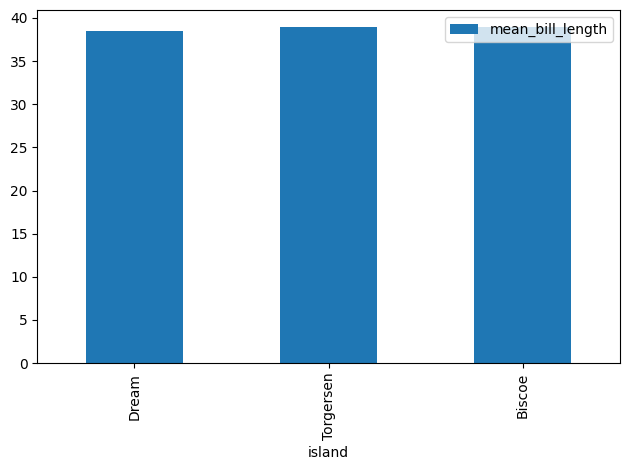

In [24]:
# 방법 1
# ggplot(result, aes(x = "island", y = "mean_bill_length")) +\
# geom_col()


# 방법 2
(peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())\
    .to_pandas()\
    .plot(x = "island", y = "mean_bill_length", kind = "bar"))

plt.tight_layout()
plt.show()


In [25]:
# pivot longer 

peng.head()

tmp = peng.pivot_longer(s.numeric() & ~ s.contains("year"), names_to = "key", values_to = "value")
tmp


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ species ┃ island    ┃ sex    ┃ year  ┃ key               ┃ value   ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string  │ string    │ string │ int64 │ string            │ float64 │
├─────────┼───────────┼────────┼───────┼───────────────────┼─────────┤
│ Adelie  │ Torgersen │ male   │  2007 │ bill_length_mm    │    39.1 │
│ Adelie  │ Torgersen │ male   │  2007 │ bill_depth_mm     │    18.7 │
│ Adelie  │ Torgersen │ male   │  2007 │ flipper_length_mm │   181.0 │
│ Adelie  │ Torgersen │ male   │  2007 │ body_mass_g       │  3750.0 │
│ Adelie  │ Torgersen │ female │  2007 │ bill_length_mm    │    39.5 │
│ Adelie  │ Torgersen │ female │  2007 │ bill_depth_mm     │    17.4 │
│ Adelie  │ Torgersen │ female │  2007 │ flipper_length_mm │   186.0 │
│ Adelie  │ Torgersen │ female │  2007 │ body_mass_g       │  3800.0 │
│ Adelie  │ Torgersen │ female │  2007 │ bill_length_mm    │    40.3 │
│ Adelie  │ Torgersen │ female │  2007 │ bill_depth_mm     │    18.0 │
│ …       │ …         │ …      │     … │ …                 │       … │
└─────────┴───────────┴────────┴───────┴───────────────────┴─────────┘

In [26]:
# pivot wider

peng.head()
tmp.pivot_wider(names_from = "key", values_from = "value")

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ species   ┃ island    ┃ sex    ┃ year  ┃ body_mass_g ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ string    │ string    │ string │ int64 │ float64     │ float64        │ float64       │ float64           │
├───────────┼───────────┼────────┼───────┼─────────────┼────────────────┼───────────────┼───────────────────┤
│ Adelie    │ Dream     │ male   │  2007 │      3900.0 │           37.2 │          18.1 │             178.0 │
│ Adelie    │ Biscoe    │ female │  2009 │      3725.0 │           35.0 │          17.9 │             192.0 │
│ Adelie    │ Torgersen │ male   │  2009 │      3775.0 │           37.3 │          20.5 │             199.0 │
│ Gentoo    │ Biscoe    │ male   │  2009 │      5450.0 │           52.5 │          15.6 │             221.0 │
│ Chinstrap │ Dream     │ female │  2009 │      3675.0 │           50.9 │          17.9 │             196.0 │
│ Adelie    │ Dream     │ male   │  2008 │      3550.0 │           41.3 │          20.3 │             194.0 │
│ Adelie    │ Torgersen │ male   │  2007 │      3750.0 │           39.1 │          18.7 │             181.0 │
│ Adelie    │ Biscoe    │ female │  2007 │      3400.0 │           37.8 │          18.3 │             174.0 │
│ Adelie    │ Dream     │ male   │  2009 │      4475.0 │           37.5 │          18.5 │             199.0 │
│ Gentoo    │ Biscoe    │ male   │  2007 │      5700.0 │           50.0 │          16.3 │             230.0 │
│ …         │ …         │ …      │     … │           … │              … │             … │                 … │
└───────────┴───────────┴────────┴───────┴─────────────┴────────────────┴───────────────┴───────────────────┘

In [27]:
# 결측치 처리
peng.head()

# 특정열 대상 결측치 처리
peng.bill_length_mm.isnull().sum()         # 특정열 결측치 갯수 
peng.filter(peng.bill_length_mm.notnull()) # 특정열 결측치 제외 데이터 보기
peng.bill_length_mm.fillna(0)              # 특정열 결측치 대체 

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┌───┐
│ 2 │
└───┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           37.8 │          17.1 │               186 │        3300 │ NULL   │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Coalesce((bill_length_mm, 0)) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ float64                       │
├───────────────────────────────┤
│                          39.1 │
│                          39.5 │
│                          40.3 │
│                           0.0 │
│                          36.7 │
│                          39.3 │
│                          38.9 │
│                          39.2 │
│                          34.1 │
│                          42.0 │
│                             … │
└───────────────────────────────┘

In [28]:
# 2개열 결측치 대체
peng.mutate(bill_length_mm = _.bill_length_mm.fillna(0), sex = _.sex.fillna("unknown"))
peng.mutate(bill_length_mm = _.bill_length_mm.fillna(_.bill_length_mm.mean()), sex = _.sex.fillna("unknown"))

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex     ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string  │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼─────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male    │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female  │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female  │  2007 │
│ Adelie  │ Torgersen │            0.0 │          NULL │              NULL │        NULL │ unknown │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female  │  2007 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male    │  2007 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female  │  2007 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male    │  2007 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ unknown │  2007 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ unknown │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …       │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴─────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex     ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string  │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼─────────┼───────┤
│ Adelie  │ Torgersen │       39.10000 │          18.7 │               181 │        3750 │ male    │  2007 │
│ Adelie  │ Torgersen │       39.50000 │          17.4 │               186 │        3800 │ female  │  2007 │
│ Adelie  │ Torgersen │       40.30000 │          18.0 │               195 │        3250 │ female  │  2007 │
│ Adelie  │ Torgersen │       43.92193 │          NULL │              NULL │        NULL │ unknown │  2007 │
│ Adelie  │ Torgersen │       36.70000 │          19.3 │               193 │        3450 │ female  │  2007 │
│ Adelie  │ Torgersen │       39.30000 │          20.6 │               190 │        3650 │ male    │  2007 │
│ Adelie  │ Torgersen │       38.90000 │          17.8 │               181 │        3625 │ female  │  2007 │
│ Adelie  │ Torgersen │       39.20000 │          19.6 │               195 │        4675 │ male    │  2007 │
│ Adelie  │ Torgersen │       34.10000 │          18.1 │               193 │        3475 │ unknown │  2007 │
│ Adelie  │ Torgersen │       42.00000 │          20.2 │               190 │        4250 │ unknown │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …       │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴─────────┴───────┘

In [29]:
# 결측치가 없는 행만 추출

all_columns_notnull_condition = [peng[col].notnull() for col in peng.columns]
peng.filter(all_columns_notnull_condition).count()
peng.count()

┌─────┐
│ 333 │
└─────┘

┌─────┐
│ 344 │
└─────┘

In [30]:
# 모든 컬럼에서 결측치가 있는 행 제거
peng.dropna().count()

# 특정 컬럼들만, 둘 중 1변수에 결측치가 있어도 제거
peng.dropna(['bill_length_mm', 'bill_depth_mm']).count()

# how 옵션
peng.dropna(how = 'any').count()   # 하나라도 결측치 있으면 제거 (기본값)
peng.dropna(how = 'all').count()   # 모두 결측치인 행만 제거

┌─────┐
│ 333 │
└─────┘

┌─────┐
│ 342 │
└─────┘

┌─────┐
│ 333 │
└─────┘

┌─────┐
│ 344 │
└─────┘

In [31]:
# 중복치 처리

cnt_group = peng.group_by(peng.columns).aggregate(count = peng.count())
cnt_group

cnt_group.filter(cnt_group["count"] > 1)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃ count ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┼───────┤
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │     1 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │     1 │
│ Adelie  │ Torgersen │           38.6 │          21.2 │               191 │        3800 │ male   │  2007 │     1 │
│ Adelie  │ Torgersen │           36.6 │          17.8 │               185 │        3700 │ female │  2007 │     1 │
│ Adelie  │ Torgersen │           42.5 │          20.7 │               197 │        4500 │ male   │  2007 │     1 │
│ Adelie  │ Biscoe    │           35.9 │          19.2 │               189 │        3800 │ female │  2007 │     1 │
│ Adelie  │ Dream     │           39.5 │          17.8 │               188 │        3300 │ female │  2007 │     1 │
│ Adelie  │ Dream     │           39.2 │          21.1 │               196 │        4150 │ male   │  2007 │     1 │
│ Adelie  │ Dream     │           36.5 │          18.0 │               182 │        3150 │ female │  2007 │     1 │
│ Adelie  │ Biscoe    │           36.4 │          17.1 │               184 │        2850 │ female │  2008 │     1 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┴───────┘

┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃ species ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃ count ┃
┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ string  │ string │ float64        │ float64       │ int64             │ int64       │ string │ int64 │ int64 │
└─────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┴───────┘

In [32]:
# if else 사용

peng.agg(_.bill_length_mm.mean())

peng.mutate(big_small = ibis.ifelse(_.bill_length_mm > _.bill_length_mm.mean(), "big", "not big"))

┏━━━━━━━━━━━━━━━━━━━━━━┓
┃ Mean(bill_length_mm) ┃
┡━━━━━━━━━━━━━━━━━━━━━━┩
│ float64              │
├──────────────────────┤
│             43.92193 │
└──────────────────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃ big_small ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │ string    │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┼───────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │ not big   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │ not big   │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │ not big   │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │ not big   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │ not big   │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │ not big   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │ not big   │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │ not big   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │ not big   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │ not big   │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │ …         │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┴───────────┘

In [33]:
# ifelse가 여려 가지인 경우

peng.mutate(
    size = (_.bill_length_mm > 43).ifelse(
        'big',
        (_.bill_length_mm > 30).ifelse('medium', 'small')
    )
)


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃ size   ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ int64             │ int64       │ string │ int64 │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │               181 │        3750 │ male   │  2007 │ medium │
│ Adelie  │ Torgersen │           39.5 │          17.4 │               186 │        3800 │ female │  2007 │ medium │
│ Adelie  │ Torgersen │           40.3 │          18.0 │               195 │        3250 │ female │  2007 │ medium │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │ small  │
│ Adelie  │ Torgersen │           36.7 │          19.3 │               193 │        3450 │ female │  2007 │ medium │
│ Adelie  │ Torgersen │           39.3 │          20.6 │               190 │        3650 │ male   │  2007 │ medium │
│ Adelie  │ Torgersen │           38.9 │          17.8 │               181 │        3625 │ female │  2007 │ medium │
│ Adelie  │ Torgersen │           39.2 │          19.6 │               195 │        4675 │ male   │  2007 │ medium │
│ Adelie  │ Torgersen │           34.1 │          18.1 │               193 │        3475 │ NULL   │  2007 │ medium │
│ Adelie  │ Torgersen │           42.0 │          20.2 │               190 │        4250 │ NULL   │  2007 │ medium │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┴────────┘

In [34]:
type(peng.agg(_.bill_length_mm.quantile([0.25, 0.5, 0.75])).execute())
type(peng.agg(_.bill_length_mm.quantile([0.25, 0.5, 0.75])))


pandas.core.frame.DataFrame

ibis.expr.types.relations.Table

In [35]:
# pandas 데이터 프레임 처리 : 속도 개선

!ls

df = pd.read_csv("peng.csv")
tbl = ibis.memtable(df)

00_ibis_file.ipynb
01_ibis_db.ipynb
02_ibis_selectors.ipynb
11_vaex_전처리.ipynb
12_vaex_시각화.ipynb
13_vaex_모델링_분류.ipynb
14_vaex_모델링_회귀.ipynb
15_vaex_모델링_군집.ipynb
16_vaex_텐서플로.ipynb
2026_Python으로 DB 다루기_이후선.hwp
peng.csv
taxi_s.hdf5
vaex_ref_interactive.ipynb
vaex_ref_ml.ipynb
vaex_ref_plot.ipynb
vaex_ref_review.ipynb


In [36]:
tbl

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ year  ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ male   │  2007 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ female │  2007 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ female │  2007 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │  2007 │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ female │  2007 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ male   │  2007 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ female │  2007 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ male   │  2007 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │  2007 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │  2007 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘